In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
cleanDf = pd.read_csv(r'E:\Notebooks\Portfolio\Data\cleaned_data.csv')

In [4]:
cleanDf.head(5)

,Unnamed: 0,Title,Year,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,2022,"Bandai Namco Entertainment, FromSoftware",4.5,3900,3900,"Adventure, RPG","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,1,Hades,2019,Supergiant Games,4.3,2900,2900,"Adventure, Brawler, Indie, RPG",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,2,The Legend of Zelda: Breath of the Wild,2017,"Nintendo, Nintendo EPD Production Group No. 3",4.4,4300,4300,"Adventure, RPG",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,3,Undertale,2015,"tobyfox, 8-4",4.2,3500,3500,"Adventure, Indie, RPG, Turn Based Strategy","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
4,4,Hollow Knight,2017,Team Cherry,4.4,3000,3000,"Adventure, Indie, Platform",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300


In [5]:
cleanDf.dtypes

Unnamed: 0             int64
Title                 object
Year                   int64
Team                  object
Rating               float64
Times Listed           int64
Number of Reviews      int64
Genres                object
Summary               object
Reviews               object
Plays                  int64
Playing                int64
Backlogs               int64
Wishlist               int64
dtype: object

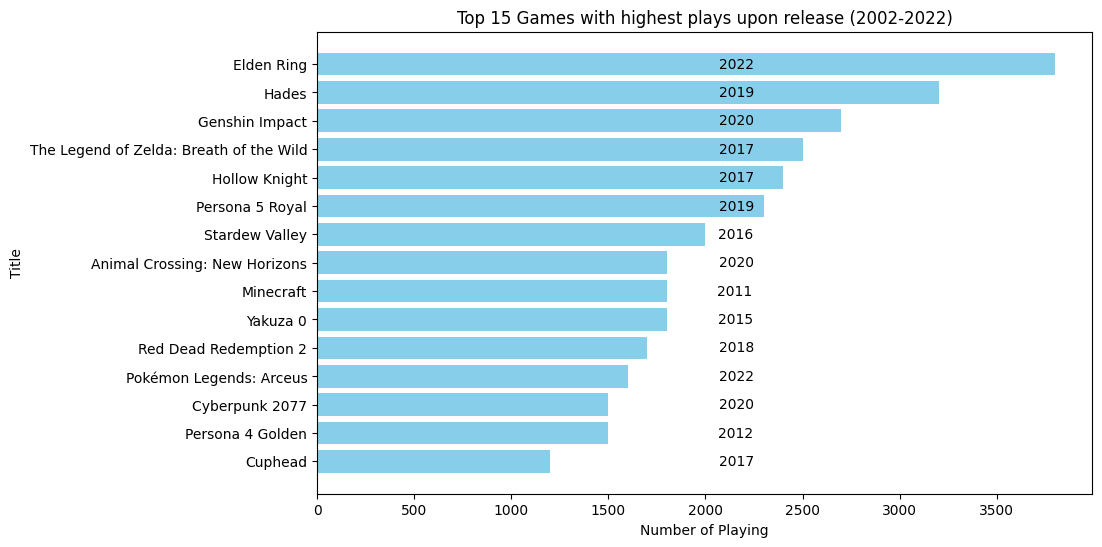

In [26]:
filteredHighestgames_df = cleanDf[(cleanDf['Year'] >= 2002) & (cleanDf['Year'] <= 2022)]

# Sort by 'Playing' and get the top 15 games
top_15_games = filteredHighestgames_df.sort_values(by='Playing', ascending=False).head(15)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_15_games['Title'], top_15_games['Playing'], color='skyblue')
plt.xlabel('Number of Playing')
plt.ylabel('Title')
plt.title('Top 15 Games with highest plays upon release (2002-2022)')

# Add release year labels to the right of the bars
for index, value in enumerate(top_15_games['Year']):
    plt.text(value + 50, index, str(value), color='black', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.show()

    Unnamed: 0                                    Title  Year  \
2            2  The Legend of Zelda: Breath of the Wild  2017   
0            0                               Elden Ring  2022   
3            3                                Undertale  2015   
14          14                               Bloodborne  2015   
4            4                            Hollow Knight  2017   
12          12                               God of War  2018   
19          19                      Super Mario Odyssey  2017   
17          17                    Red Dead Redemption 2  2018   
13          13                                 Portal 2  2011   
1            1                                    Hades  2019   
9            9                           NieR: Automata  2017   
15          15                                  Celeste  2018   
10          10                          Persona 5 Royal  2019   
16          16                                 Yakuza 0  2015   
41          41           

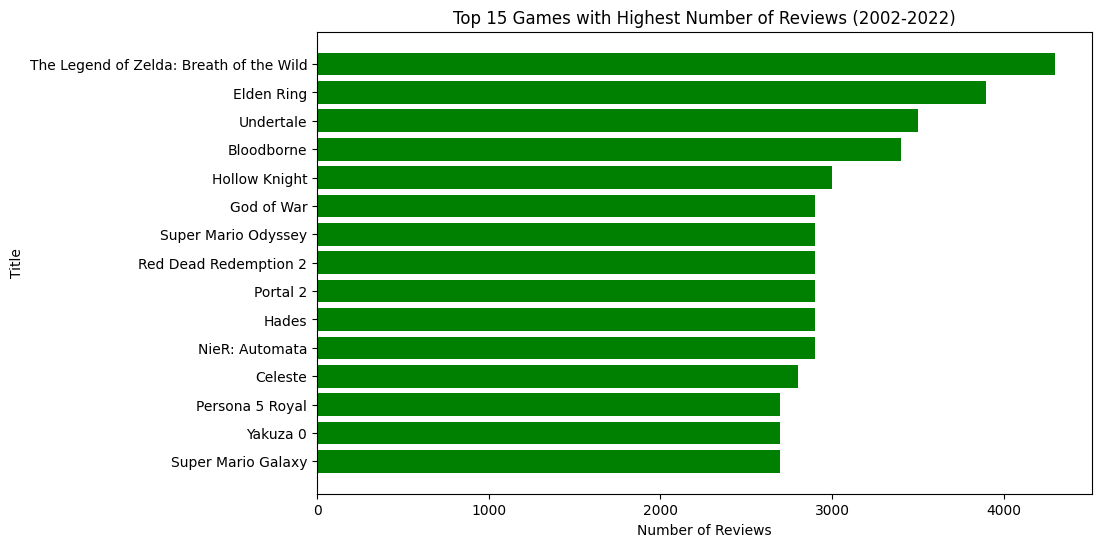

In [25]:
filteredHighestReviews_df = cleanDf[(cleanDf['Year'] >= 2002) & (cleanDf['Year'] <= 2022)]

# Sort by 'Reviews' and get the top 15 games
top_15_games = filteredHighestReviews_df.sort_values(by='Number of Reviews', ascending=False).head(15)

print(top_15_games)
plt.figure(figsize=(10, 6))
plt.barh(top_15_games['Title'], top_15_games['Number of Reviews'], color='green')
plt.xlabel('Number of Reviews')
plt.ylabel('Title')
plt.title('Top 15 Games with Highest Number of Reviews (2002-2022)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.show()

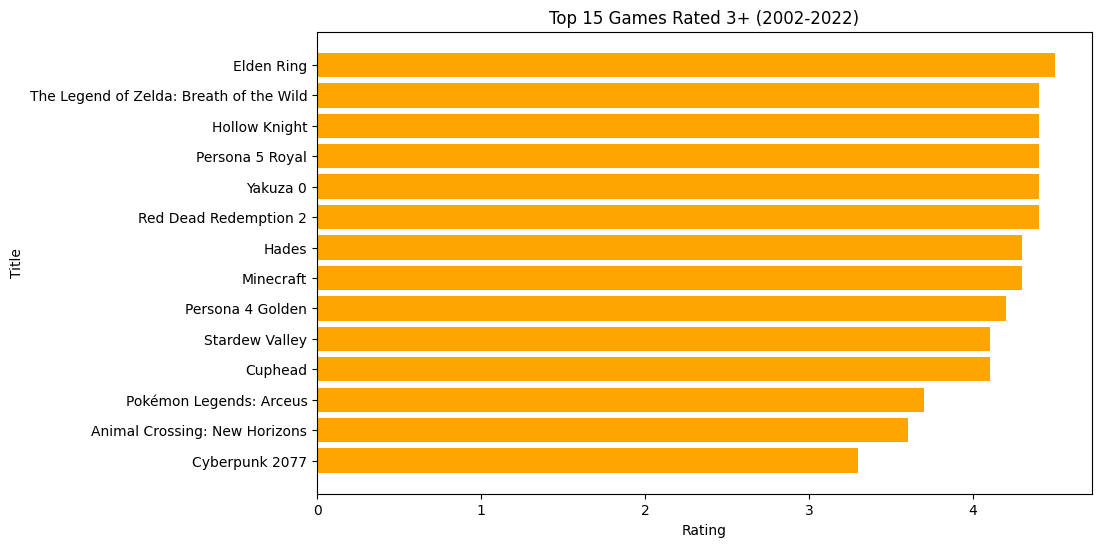

In [27]:
filteredHighestRating_df = top_15_games[(top_15_games['Rating'] >= 3) & (top_15_games['Year'] >= 2002) & (top_15_games['Year'] <= 2022)]

# Sort by 'Rating' in descending order
sorted_df = filteredHighestRating_df.sort_values(by='Rating', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_df['Title'], sorted_df['Rating'], color='orange')  # Use 'green' color
plt.xlabel('Rating')
plt.ylabel('Title')
plt.title('Top 15 Games Rated 3+ (2002-2022)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.show()

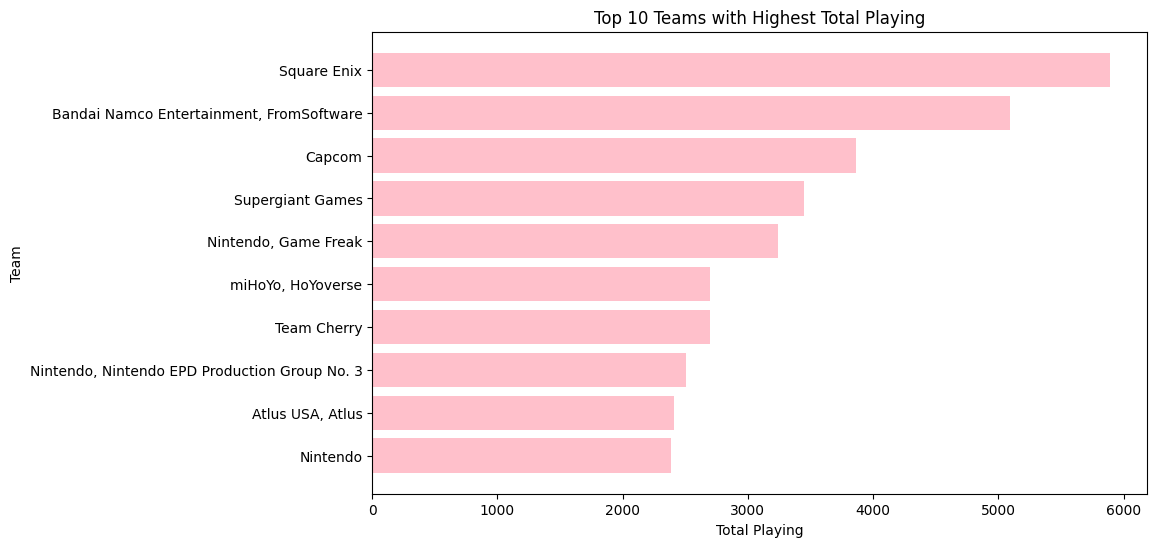

In [36]:
team_title_group = cleanDf.groupby(['Team', 'Title'])['Playing'].sum().reset_index()

# Group by 'Team' and sum up the 'Playing' values to get the total playing per team
team_group = team_title_group.groupby('Team')['Playing'].sum().reset_index()

# Sort by 'Playing' in descending order and get the top 10 teams
top_10_teams = team_group.sort_values(by='Playing', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_teams['Team'], top_10_teams['Playing'], color='pink')  # Use 'orange' color
plt.xlabel('Total Playing')
plt.ylabel('Team')
plt.title('Top 10 Teams with Highest Total Playing')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.show()

Team: Capcom, Titles Count: 23
Team: Square Enix, Titles Count: 20
Team: Nintendo, Game Freak, Titles Count: 12
Team: Nintendo EAD, Nintendo, Titles Count: 9
Team: Konami, Titles Count: 9
Team: Intelligent Systems Co., Ltd., Nintendo, Titles Count: 9
Team: Nintendo, Nintendo EAD, Titles Count: 9
Team: Nintendo, Titles Count: 9
Team: HAL Laboratory, Nintendo, Titles Count: 7
Team: Sonic Team, Sega, Titles Count: 7


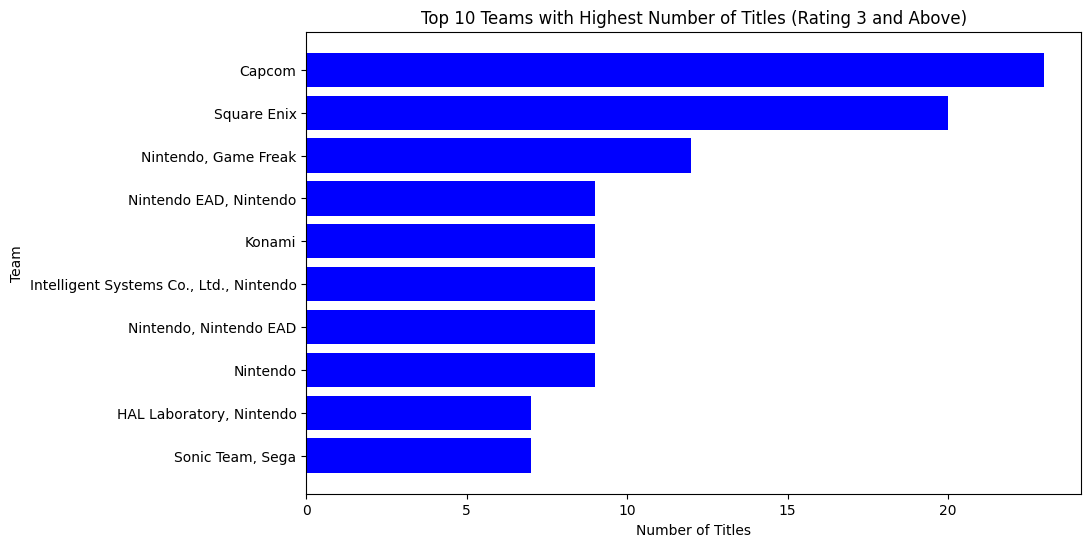

In [35]:
filteredTopTeam_df = cleanDf[cleanDf['Rating'] >= 3]

# Group by 'Team' and count the number of titles
team_titles_count = filteredTopTeam_df.groupby('Team')['Title'].count().reset_index()

# Sort by titles count in descending order and get the top 10 teams
top_10_teams = team_titles_count.sort_values(by='Title', ascending=False).head(10)

# Print the list of teams and titles count
for index, row in top_10_teams.iterrows():
    print(f"Team: {row['Team']}, Titles Count: {row['Title']}")

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_teams['Team'], top_10_teams['Title'], color='blue')  # Use 'blue' color
plt.xlabel('Number of Titles')
plt.ylabel('Team')
plt.title('Top 10 Teams with Highest Number of Titles (Rating 3 and Above)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.show()



